# K-Nearest Neighbor
K 와 가장 가까운 것을 찾는 것
<br>
data set의 특징(feature) = target class = 벡터 (= DB의 스키마, 열)<br>
feature space = x,y,z, ... 축으로 teature 가 들어간 figure<br>
<br>

K는 보통 홀수를 준다.<br>
새로운 데이터(행)가 들어오면 그 데이터를 feature space에 그린다.<br>
그려진 새로은 데이터와 가장 가까운 K개를 추출한다.<br>
추출된 K개 중 많은 결과를 예측 한다.<br>
<br>
<br>
가까운 K개를 찾는 방법.(배웠던 것 중..)<br>
Euclidean distance(두 점 사이의 최단 거리. 피타고라스의 정리)<br>
Manhattan distance(수직으로의 최단 거리. 상하좌우 이동)<br>
<br>
<br>
Hyper parameter = 사람이 조정해줘야 하는 것.<br>
K는 사람이 적절하게 조정해야 한다..(K는 Hyper parameter 이다.)<br>
optimization : 최적화.<br>
K 값을 조절해 가며 답을 찾아야 한다.<br>


decision boundary : https://wikidocs.net/4288

In [30]:
import matplotlib.pyplot as plt
import numpy as np
figsize = (7, 7)

In [29]:
# Euclidean & Manhattan distance 몸풀기
id5 = np.array([2.75, 7.5])
id12 = np.array([5.0, 2.5])
id17 = np.array([5.25, 9.5])

print(f'Manhattan distance 12 - 5 : {np.sum(np.abs(id5 - id12))}')
print(f'Euclidean distance 12 - 5 : {np.sum(np.square(id5 - id12))**0.5}')
print(f'Manhattan distance 12 - 17: {np.sum(np.abs(id17 - id12))}')
print(f'Euclidean distance 12 - 17: {np.sum(np.square(id17 - id12))**0.5}')

# 12 기준으로 5와 17의 distance 비교
# Manhattan distance는 둘다 같지만 Euclidean 에서 차이가 발생한다.
# 결과) distance의 기준을 항상 같은(이번엔 Manhattan) 기준으로 하면 적절하지 못할 수 있다. 

Manhattan distance 12 - 5 : 7.25
Euclidean distance 12 - 5 : 5.482928049865327
Manhattan distance 12 - 17: 7.25
Euclidean distance 12 - 17: 7.00446286306095


(array([ 3.,  1.,  6., 17., 19., 20., 14., 12.,  5.,  3.]),
 array([-34.52308045, -27.7924093 , -21.06173814, -14.33106699,
         -7.60039583,  -0.86972468,   5.86094648,  12.59161763,
         19.32228879,  26.05295994,  32.7836311 ]),
 <BarContainer object of 10 artists>)

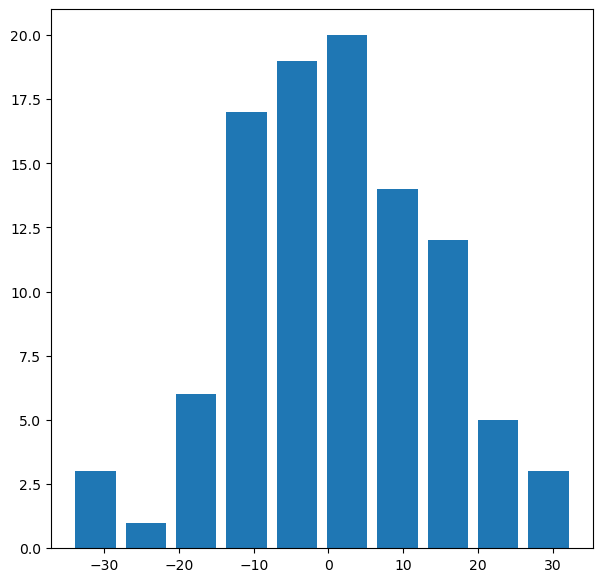

In [45]:
np.random.seed(1)
n_data = 100

x_data = np.random.normal(0, 15, n_data)

fig, ax = plt.subplots(figsize=figsize)
ax.hist(x_data, rwidth=0.8)

shape of x_data: (100, 1)
shape of y_data: (100, 1)
shape of xy_set: (100, 2)
shape of data: (100, 2)
mean : [4.94956058 3.04009761]
std  : [1.10653621 0.99964941]


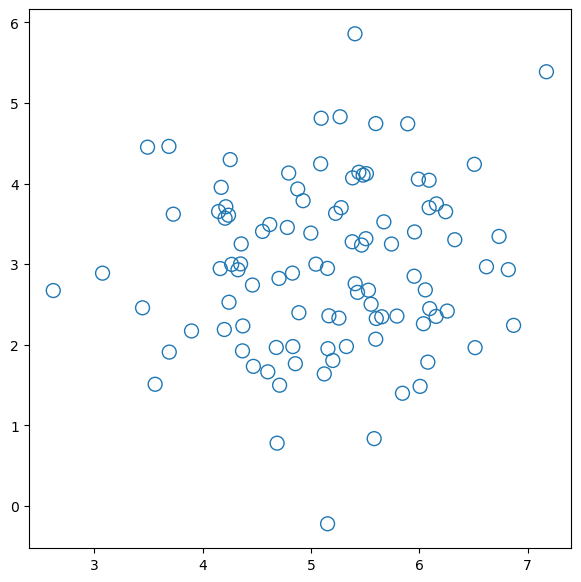

In [81]:
# dataset 1cluster : (100, 2) dataset

# method 1
x_data = np.random.normal(5, 1, size=(100, 1))
y_data = np.random.normal(3, 1, size=(100, 1))

print(f'shape of x_data: {x_data.shape}')
print(f'shape of y_data: {y_data.shape}')

# data = np.concatenate((x_data, y_data), axis=0)
xy_set = np.hstack((x_data, y_data))
print(f'shape of xy_set: {xy_set.shape}')

# method 2(한번에 만들기)
data = np.random.normal((5, 3), (1, 1), size=(100, 2))
print(f'shape of data: {data.shape}')
print(f'mean : {np.mean(data, axis=0)}') # axis 중요
print(f'std  : {np.std(data, axis=0)}')

# matplot
fig, ax = plt.subplots(figsize=figsize)
ax.scatter(x_data, y_data, s=100,
           facecolor='None',
           edgecolor='tab:blue',
           linewidth=1)

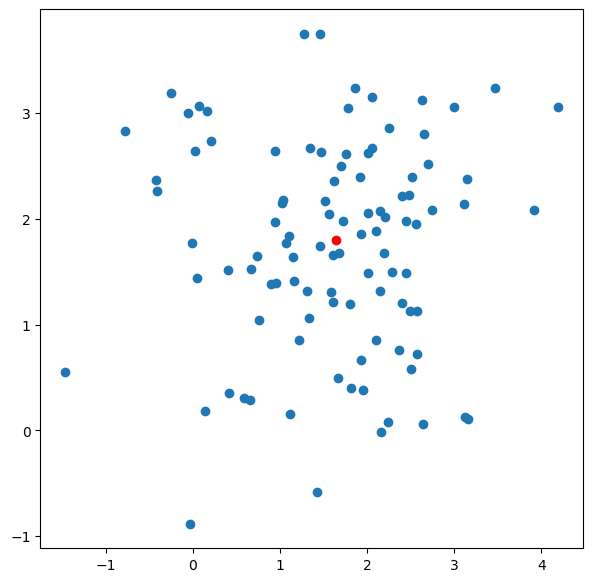

In [125]:
# random centroid
centroid = np.random.uniform(0, 5,size=(2, ))
# centroid = np.random.randint(0, 5,size=(2, ))

data = np.random.normal(loc=(centroid), scale=1, size=(100, 2))

# matplot
fig, ax = plt.subplots(figsize=figsize)
ax.scatter(data[:, 0], data[:, 1])
ax.scatter(centroid[0], centroid[1], c='red',)

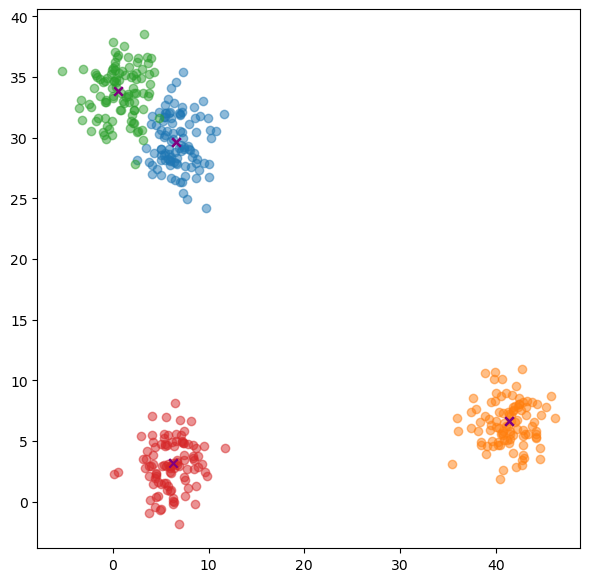

In [348]:
# knn x dataset
# 4 class, class 마다 100개의 점을 가지는 dataset 만들기 -> (400, 2) -> class들의 centroid는 랜덤
centroid = np.random.uniform(0, 50,size=(2, 4))
n_class = len(centroid[0])

dataset = np.array([np.random.normal(centroid[:, i], 2, size=(100, 2)) for i in range(n_class)])
# print(dataset.shape)# (4, 100, 2)

# matplot
fig, ax = plt.subplots(figsize=figsize)
for data in dataset:
    ax.scatter(data[:, 0], data[:, 1], alpha=0.5)
    ax.scatter(centroid[0], centroid[1], marker='x', c='purple') # type: ignore


In [200]:
# target class 값을 부여한다. (= iris의 꽃 종류)
# 모든값이 0, 모양이 (100,)인 ndarray,
# 모든값이 1, 모양이 (100,)인 ndarray,
# 모든값이 2, 모양이 (100,)인 ndarray ... 을 차례대로 출력하기

n_classes = 4
n_data = 100

data = np.hstack([class_idx * np.ones(100,) for class_idx in range(n_classes)])
print(data.shape)
print(data)

(400,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3

[[0.31175879]
 [0.4592004 ]
 [0.59072256]
 [0.66182347]
 [1.03046844]]
[[0.31175879]
 [0.4592004 ]
 [0.59072256]
 [0.66182347]
 [1.03046844]]
(array([0, 1, 2, 3, 4]), array([80, 86, 18, 55, 22]))
[[19.28985325  7.89112227  0.          0.31175879]
 [19.11001842  7.81501577  0.          0.4592004 ]
 [19.98202361  8.15797957  0.          0.59072256]
 [19.23708962  8.31719244  0.          0.66182347]
 [20.56047581  8.00102617  0.          1.03046844]]


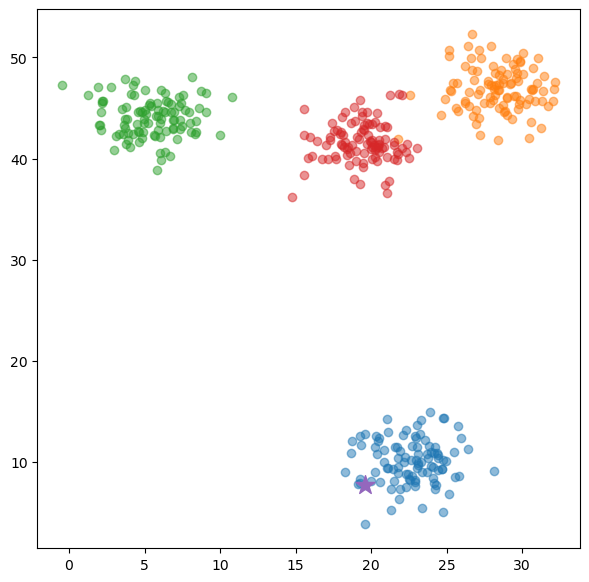

In [364]:
# KNN dataset
# 4개의 class를 가지는 dataset 만들기
n_classes = 4
n_features = 2
n_data = 100
centroid = np.random.uniform(0, 50, size=(n_features, n_classes))
K = 5

# 4개의 클래스 데이터셋
class_data = np.hstack([class_idx * np.ones(100,) for class_idx in range(n_classes)])
class_data = class_data.reshape(-1, 1)

# Target data
tmp_data_scale = 2
dataset = np.vstack([np.random.normal(centroid[:, i], tmp_data_scale, size=(n_data, n_features)) for i in range(n_classes)])
# print(dataset.shape) # (400, 2)

# target class & data
dataset = np.concatenate((dataset, class_data), axis=1)
# print(dataset.shape) # (400, 3)


# euclidean distance
sample_data = dataset[0, :n_features]

e_dists = np.linalg.norm((sample_data - dataset[:,:n_features]), axis=1).reshape(-1, 1)
# print(e_dists.shape) # (400, 1)
print(np.sort(e_dists, axis=0)[1:1+K]) # e_dists 오름정렬
dataset = np.concatenate((dataset, e_dists), axis=1)

# classify
print(np.sort(dataset[:,3], axis=0)[1:1+K].reshape(-1, 1)) # dataset의 e_dists(3) 기준 오름차순 정렬
# print(dataset[:,3==np.sort(dataset[:,3], axis=0)[1:6].reshape(-1, 1)])
# print(type(np.where(dataset[:,3]==(np.sort(e_dists, axis=0)[1:1+K]))))
tmp_tupl = np.where(dataset[:,3]==(np.sort(e_dists, axis=0)[1:1+K]))
print(np.where(dataset[:,3]==(np.sort(e_dists, axis=0)[1:1+K])))
print(dataset[tmp_tupl[1]])


# KNN visualization
# np.meshgrid
# matplot
fig, ax = plt.subplots(figsize=figsize)
for idx_class in range(n_classes):
    ax.scatter(dataset[idx_class*n_data:(idx_class+1)*n_data,0], dataset[idx_class*n_data:(idx_class+1)*n_data,1], alpha=0.5)

ax.scatter(sample_data[0], sample_data[1], marker='*', s=200) # type: ignore
